In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import random

%matplotlib inline 

## Rosenbrock function and Gradient update.

The function is defined as:

$f(x,y) = x^2 + 100(y-x^2)^2$

Gradients with respect to x and y are:

$\nabla_x f(x,y) = 2x - 400x(y-x^2)$

$\nabla_y f(x,y) = 200(y-x^2)$



In [161]:
def gradient_descent(eta, max_epochs=1000):
    counter = 0
    convergence = True
    
    x, y = np.random.randint(-100, 100, 2)
    J = x**2 + 100*(y-x**2)**2
    delta_J = J
    
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors = [(J, x, y)]
    while J > 0.001:

        d_J_x = 2 * x - 400 * x * (y - x**2)
        d_J_y = 200 * (y - x**2)

        x -= eta * d_J_x
        y -= eta * d_J_y
        
        J_new = x**2 + 100 * (y - x**2)**2
        delta_J = J - J_new
        
        J = J_new
        
        
        counter += 1
        
        if counter > max_epochs:
            convergence = False
            break
        
        if counter % 1000 == 0:
            errors.append((J, x, y))
            print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    return convergence, errors

In [104]:
def create_contour_plot(errors):
    a, b = [x[1] for x in errors], [x[2] for x in errors]
    A = np.linspace(min(a) - 5, max(a) + 5, 1000)
    B = np.linspace(min(b) - 5, max(b) + 5, 1000)

    A, B = np.meshgrid(A, B)

    Z = A**2 + 100*(B-A**2)**2
    
    
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()

    ax.contourf(A, B, Z)
#     ax.plot(a, b)
#     ax.scatter(a, b)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Error Contours and GD updates')
    
    for i in range(len(a)-1):
        ax.arrow(a[i], b[i], a[i+1]-a[i], b[i+1]-b[i], head_width=0.5, head_length=0.5, fc='k', ec='k')
    
    plt.show()
    

In [105]:
c, errors = gradient_descent(1.2e-6, max_epochs=100000)

Epoch 0 - Error:72761684, a:28, b:-69
Epoch 1000 - Error:289590.3179763114, a:9.827021728798629e-13, b:-53.81359660683454
Epoch 2000 - Error:179183.35628128337, a:7.942828181556463e-23, b:-42.33005507689346
Epoch 3000 - Error:110869.2976774573, a:9.568571442869636e-31, b:-33.29704156189515
Epoch 4000 - Error:68600.12795048098, a:5.802505544736203e-37, b:-26.19162613326652
Epoch 5000 - Error:42446.17449019163, a:7.592958257624416e-42, b:-20.6024693884475
Epoch 6000 - Error:26263.47475841959, a:1.1057912492533768e-45, b:-16.20600961323286
Epoch 7000 - Error:16250.465788042524, a:1.067369119283342e-48, b:-12.747731479774165
Epoch 8000 - Error:10054.939064895887, a:4.5494853887937885e-51, b:-10.027431906971938
Epoch 9000 - Error:6221.470874586388, a:6.227297060881012e-53, b:-7.887630109599707
Epoch 10000 - Error:3849.521075514105, a:2.1319874378539376e-54, b:-6.204450882643931
Epoch 11000 - Error:2381.882485596687, a:1.5003661990910736e-55, b:-4.880453345332467
Epoch 12000 - Error:1473.784

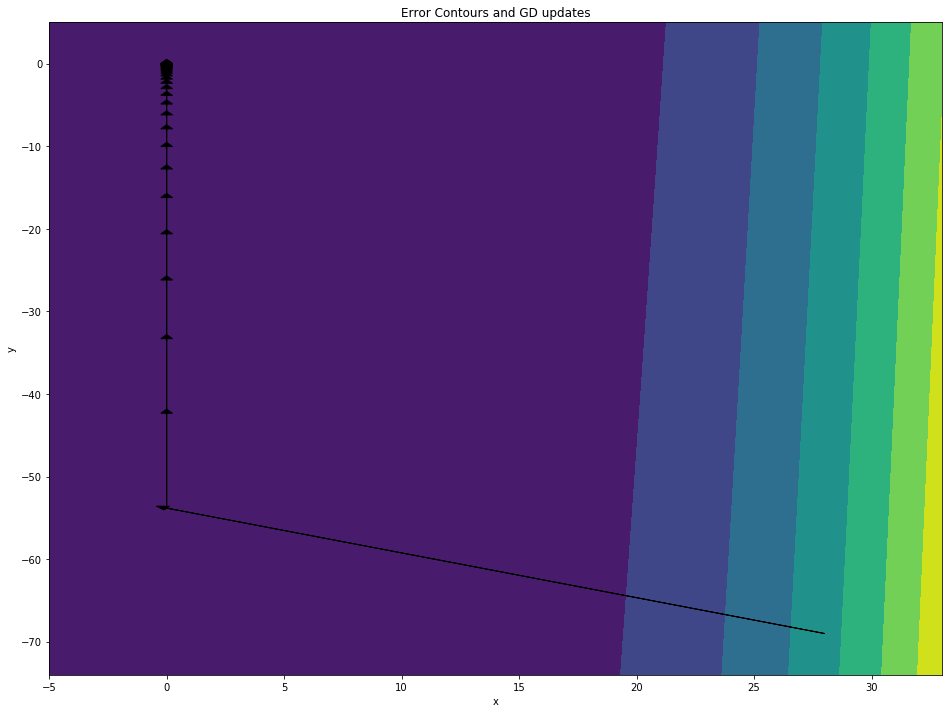

In [106]:
create_contour_plot(errors)

### Polyaks Momentum method

$v_{t+1} = \alpha v_t - \eta \nabla_\theta f(\theta_t) $

$\theta_{t+1} = \theta_t + v_{t+1}$

In [136]:
def gradient_descent_momentum(eta, alpha, max_epochs=1000):
    counter = 0
    convergence = True
    
    x, y = np.random.randint(-100, 100, 2)
    J = x**2 + 100*(y-x**2)**2
    delta_J = J
    
    v_x_old = 0
    v_y_old = 0
    
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors = [(J, x, y)]
    while J > 0.001:

        d_J_x = 2 * x - 400 * x * (y - x**2)
        d_J_y = 200 * (y - x**2)
    
        v_x = alpha * v_x_old - eta * d_J_x
        v_y = alpha * v_y_old - eta * d_J_y
        
        x += v_x
        y += v_y
        
        J_new = x**2 + 100 * (y - x**2)**2
        delta_J = J - J_new
        
        J = J_new
        
        v_x_old = v_x
        v_y_old = v_y
        
        counter += 1
        
        if counter > max_epochs:
            convergence = False
            break
        
        if counter % 100 == 0:
            errors.append((J, x, y))
            print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    return convergence, errors

In [137]:
c, errors = gradient_descent_momentum(1e-7, 0.98, 100000)

Epoch 0 - Error:280925, a:-5, b:-28
Epoch 100 - Error:87898.02205471559, a:1.9210336377839894, b:-25.956607970150845
Epoch 200 - Error:56943.164307991756, a:-0.755268194879529, b:-23.29221730860158
Epoch 300 - Error:44154.46465078752, a:0.2991860615948943, b:-20.923430173815582
Epoch 400 - Error:35452.4901482578, a:-0.09883625681677605, b:-18.819060455024122
Epoch 500 - Error:28672.790216422807, a:0.01732838507558718, b:-16.932741366466082
Epoch 600 - Error:23216.226027327717, a:0.005861773912453842, b:-15.236837363476734
Epoch 700 - Error:18799.33935016031, a:-0.005781357174531933, b:-13.711034848197935
Epoch 800 - Error:15222.800687807157, a:0.0015052906895584154, b:-12.338069173973052
Epoch 900 - Error:12326.760820349224, a:0.0003894177720682242, b:-11.102594509151597
Epoch 1000 - Error:9981.67981265653, a:-0.0003086653639326371, b:-9.990835611793072
Epoch 1100 - Error:8082.734549078696, a:-1.712181240672232e-05, b:-8.990402965691407
Epoch 1200 - Error:6545.050619021743, a:4.4914200

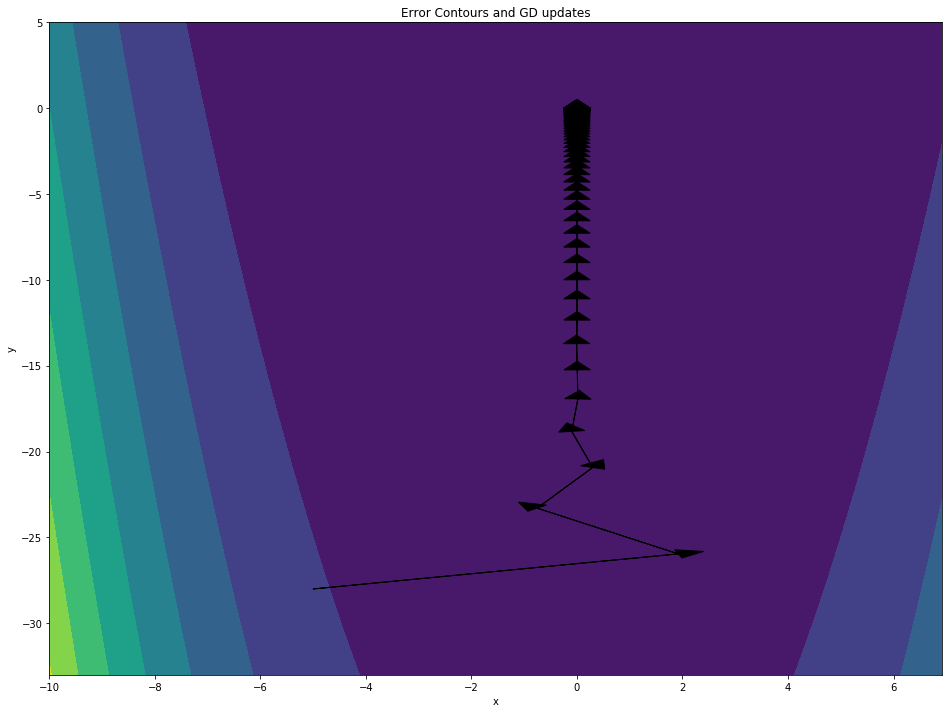

In [138]:
create_contour_plot(errors)

### Nesterov accelerated gradient

$\hat{\theta} = \theta_t + \alpha v_t$

$v_{t+1} = \alpha v_t - \eta \nabla_\theta f(\hat{\theta}) $

$\theta_{t+1} = \theta_t + v_{t+1}$

In [166]:
def gradient_descent_nesterov(eta, alpha, max_epochs=1000):
    counter = 0
    convergence = True
    
    x, y = np.random.randint(-100, 100, 2)
    J = x**2 + 100*(y-x**2)**2
    delta_J = J
    
    v_x_old = 0
    v_y_old = 0
    
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors = [(J, x, y)]
    while J > 0.001:
        x_d = x + alpha*v_x_old
        y_d = y + alpha*v_y_old
        
        d_J_x = 2 * x_d - 400 * x_d * (y_d - x_d**2)
        d_J_y = 200 * (y_d - x_d**2)
    
        v_x = alpha * v_x_old - eta * d_J_x
        v_y = alpha * v_y_old - eta * d_J_y
        
        x += v_x
        y += v_y
        
        J_new = x**2 + 100 * (y - x**2)**2
        delta_J = J - J_new
        
        J = J_new
        
        v_x_old = v_x
        v_y_old = v_y
        
        counter += 1
        
        if counter > max_epochs:
            convergence = False
            break
        
        if counter % 100 == 0:
            errors.append((J, x, y))
            print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    return convergence, errors

In [176]:
c, errors = gradient_descent_nesterov(1e-7, 0.5, 500000)

Epoch 0 - Error:3928788641, a:79, b:-27
Epoch 100 - Error:495432.54570640915, a:6.665789597185154, b:-25.951062025709625
Epoch 200 - Error:195255.4704042431, a:4.29572300886904, b:-25.732396922392994
Epoch 300 - Error:125322.48956196103, a:3.1343591384757445, b:-25.57532179282875
Epoch 400 - Error:97452.57970052357, a:2.402844128416896, b:-25.44281107390776
Epoch 500 - Error:83481.58607240548, a:1.8893520181835917, b:-25.32291138903671
Epoch 600 - Error:75534.39710257515, a:1.5075765098084526, b:-25.210321391213927
Epoch 700 - Error:70630.5288837478, a:1.2140164097492343, b:-25.102291611382494
Epoch 800 - Error:67416.942782168, a:0.983526969358122, b:-24.99726124777693
Epoch 900 - Error:65201.508347817384, a:0.8001046846223178, b:-24.89429316551218
Epoch 1000 - Error:63600.146661711246, a:0.652825511037593, b:-24.792803859581486
Epoch 1100 - Error:62387.37564182055, a:0.533841622090602, b:-24.69242104547338
Epoch 1200 - Error:61425.534329965216, a:0.43730257113504534, b:-24.59290314110

Epoch 55200 - Error:804.1229100650856, a:5.1585382977819445e-20, b:-2.8357061026578294
Epoch 55300 - Error:797.7153349459935, a:5.0428271862321107e-20, b:-2.824385481739335
Epoch 55400 - Error:791.358817965394, a:4.9301573965353497e-20, b:-2.8131100546643992
Epoch 55500 - Error:785.0529522714821, a:4.8204390862845287e-20, b:-2.801879641011516
Epoch 55600 - Error:778.7973342544099, a:4.713585331045753e-20, b:-2.7906940610794475
Epoch 55700 - Error:772.5915635204565, a:4.6095120216502615e-20, b:-2.7795531358843575
Epoch 55800 - Error:766.4352428664, a:4.508137765363971e-20, b:-2.768456687156944
Epoch 55900 - Error:760.3279782540941, a:4.409383790778933e-20, b:-2.757404537339587
Epoch 56000 - Error:754.2693787852437, a:4.3131738562775e-20, b:-2.746396509583501
Epoch 56100 - Error:748.2590566763928, a:4.219434161926315e-20, b:-2.735432427745918
Epoch 56200 - Error:742.2966272340994, a:4.128093264663319e-20, b:-2.7245121163872614
Epoch 56300 - Error:736.3817088303122, a:4.0390819966467465e-

Epoch 133900 - Error:1.4821596835022115, a:2.194101077573845e-22, b:-0.121743980693183
Epoch 134000 - Error:1.4703492383679468, a:2.1918816486041883e-22, b:-0.12125795802205919
Epoch 134100 - Error:1.4586329036158634, a:2.189672962018794e-22, b:-0.12077387563607717
Epoch 134200 - Error:1.4470099293365433, a:2.1874749559697713e-22, b:-0.12029172578928873
Epoch 134300 - Error:1.4354795715961501, a:2.1852875690327442e-22, b:-0.1198115007666689
Epoch 134400 - Error:1.4240410923888125, a:2.1831107402033806e-22, b:-0.11933319288399236
Epoch 134500 - Error:1.4126937595893805, a:2.180944408894018e-22, b:-0.11885679448771032
Epoch 134600 - Error:1.4014368469065805, a:2.178788514930272e-22, b:-0.11838229795482856
Epoch 134700 - Error:1.3902696338365153, a:2.1766429985476863e-22, b:-0.11790969569278496
Epoch 134800 - Error:1.379191405616556, a:2.1745078003884413e-22, b:-0.11743898013932835
Epoch 134900 - Error:1.3682014531795843, a:2.172382861498044e-22, b:-0.11697014376239709
Epoch 135000 - Erro

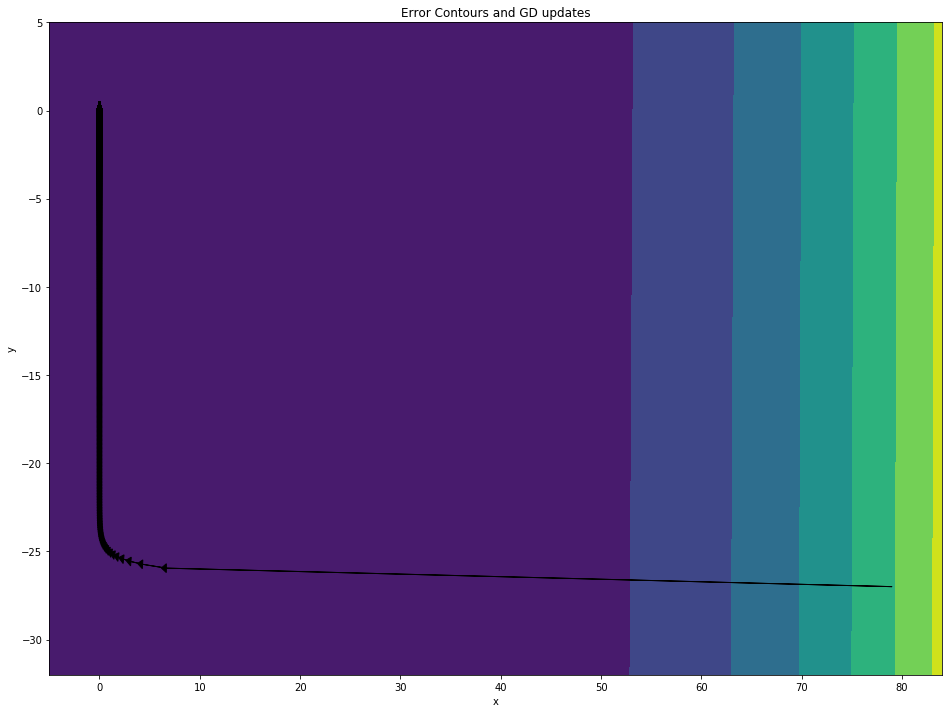

In [177]:
create_contour_plot(errors)

### Adam optimizer

$m_t = \beta_1 m_{t-1} + (1-\beta_1)\nabla_\theta f(\theta_t)$

$v_t = \beta_2 v_{t-1} + (1-\beta_2)\nabla_\theta f(\theta_t)^2$

$\hat{m}_t = \frac{m_t}{1-\beta_1^t}$

$\hat{v}_t = \frac{v_t}{1-\beta_2^t}$

$\theta_t = \theta_{t-1} - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$

In [189]:
def gradient_descent_adam(eta, beta_1, beta_2, max_epochs=1000):
    counter = 1
    convergence = True
    
    x, y = np.random.randint(-100, 100, 2)
    J = x**2 + 100*(y-x**2)**2
    delta_J = J
    
    m_x_old = 0
    m_y_old = 0
    v_x_old = 0
    v_y_old = 0
    
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors = [(J, x, y)]
    while J > 0.001:
        d_J_x = 2 * x - 400 * x * (y - x**2)
        d_J_y = 200 * (y - x**2)
    
        m_x = beta_1 * m_x_old + (1 - beta_1)* d_J_x
        v_x = beta_2 * v_x_old + (1 - beta_2)* d_J_x**2
        
        m_y = beta_1 * m_y_old + (1 - beta_1)* d_J_y
        v_y = beta_2 * v_y_old + (1 - beta_2)* d_J_y**2
        
        m_hat_x = m_x / (1 - beta_1**counter)
        v_hat_x = v_x / (1 - beta_2**counter)
        
        m_hat_y = m_y / (1 - beta_1**counter)
        v_hat_y = v_y / (1 - beta_2**counter)
        
        x -= eta * m_hat_x /(np.sqrt(v_hat_x) + 1e-10)
        y -= eta * m_hat_y /(np.sqrt(v_hat_y) + 1e-10)
        
        J_new = x**2 + 100 * (y - x**2)**2
        delta_J = J - J_new
        
        J = J_new
        
        v_x_old = v_x
        v_y_old = v_y
        
        counter += 1
        
        if counter > max_epochs:
            convergence = False
            break
        
        if counter % 1000 == 0:
            errors.append((J, x, y))
            print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors.append((J, x, y))
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    return convergence, errors

In [190]:
c, errors = gradient_descent_adam(1e-2, 0.9, 0.999, 500000)

Epoch 1 - Error:6553856, a:16, b:0
Epoch 1000 - Error:5039440.5431676395, a:15.015979407467828, b:0.9976769644269595
Epoch 2000 - Error:3901617.4616385936, a:14.122527151905208, b:1.9256978255771202
Epoch 3000 - Error:3004346.4458721485, a:13.27216290189106, b:2.824883082188758
Epoch 4000 - Error:2290455.819632969, a:12.451580846923052, b:3.704468432382974
Epoch 5000 - Error:1722290.843652404, a:11.653343089831361, b:4.569500148923795
Epoch 6000 - Error:1272965.1798627176, a:10.873945700775755, b:5.422176705053071
Epoch 7000 - Error:921657.7072319826, a:10.112396554084313, b:6.2628845811481115
Epoch 8000 - Error:651223.5653360717, a:9.369302879164964, b:7.090851523406668
Epoch 9000 - Error:447036.937530437, a:8.64636926115004, b:7.904471400627957
Epoch 10000 - Error:296440.1469274996, a:7.946187985981819, b:8.701385048136475
Epoch 11000 - Error:188469.71291960627, a:7.272233544165814, b:9.478373505593382
Epoch 12000 - Error:113699.18619252533, a:6.629016934890341, b:10.231072353851598


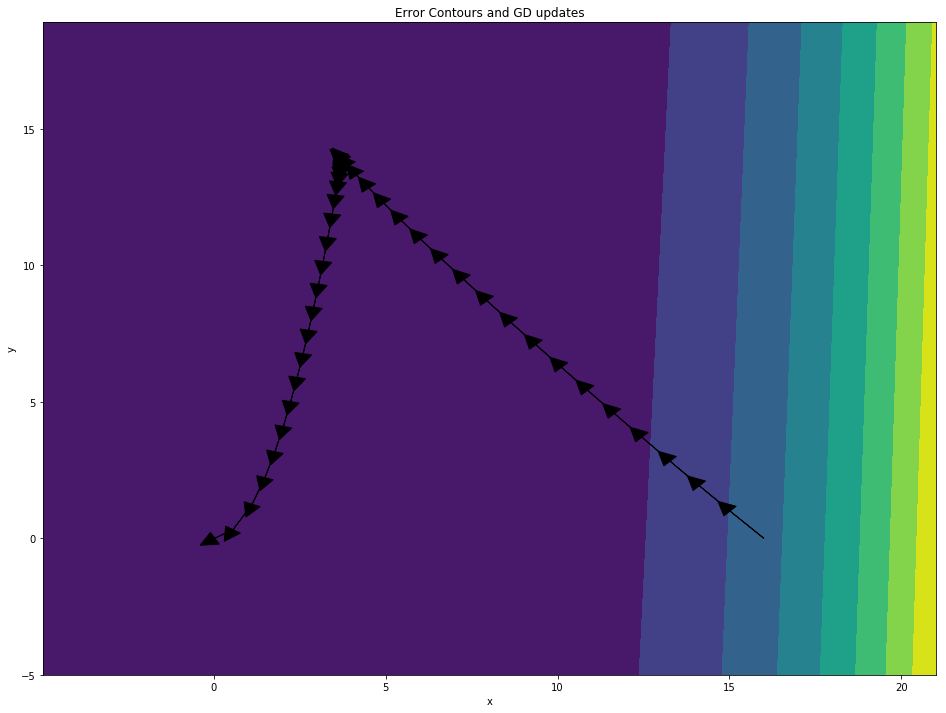

In [191]:
create_contour_plot(errors)